Write down something like:

$D_1 = F_1 G(-s/2) - F_1 G(+s/2)$

$D_2 = F_2 G(-s'/2) - F_2 G(+s'/2)$

Where $G(x)$ is a normalized Gaussian centered at $x$.

Setting $D_1 = D_2$ (in the case where the two signatures are the same):

$F_1 [G(-s/2) - G(+s/2)] = F_2 [G(-s'/2) - G(+s'/2)]$

or

$F_1/F_2 = \frac{[G(-s'/2) - G(+s'/2)]}{[G(-s/2) - G(+s/2)]}$

Then you solve for $F_1/F_2$ as a function of $s$ and $s'$ (maybe by expanding in a Taylor series). 

In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
import sympy

sympy.init_printing()

x,y,z=sympy.symbols("x y z")
k,m,n=sympy.symbols("k m n", integer=True)

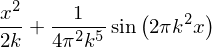

In [3]:
t = sympy.sin(2*sympy.pi*x*(k**2))/ (4*(sympy.pi**2)*(k**5)) + (x**2) / (2*k)
t

In [4]:
sympy.sqrt(8)

In [5]:
x,F,m,s = sympy.symbols("x F m s")
G = F * sympy.exp(-(x-m)**2/(2*s**2))
G

In [6]:
G.evalf(subs={x: 0, F: 1, m: 0, s: 1})

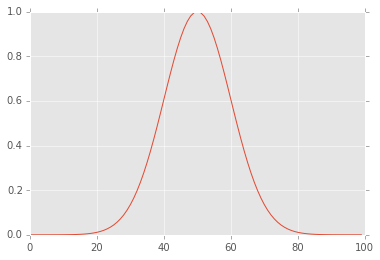

In [7]:
import numpy as np
qq = [G.evalf(subs={x: xx, F: 1, m: 0, s: 1}) for xx in np.arange(-5,5,0.1)]
plt.plot(qq)

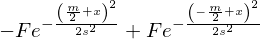

In [8]:
#DP = 1/sympy.sqrt(2*sympy.pi)*sympy.exp(-(x-m/2)**2/(2*s**2)) - \
#     1/sympy.sqrt(2*sympy.pi)*sympy.exp(-(x+m/2)**2/(2*s**2))
x,F,m,s = sympy.symbols("x F m s")

D = G.subs(m, +m/2) - G.subs(m, -m/2)
D

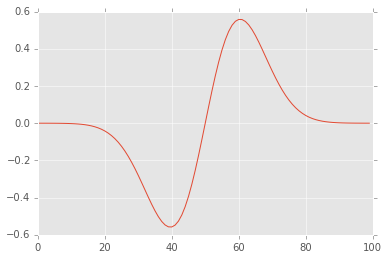

In [9]:
qq = [D.evalf(subs={x: xx, F: 1, m: 1, s: 1}) for xx in np.arange(-5,5,0.1)]
plt.plot(qq)

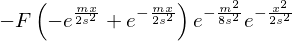

In [10]:
sympy.factor(D)

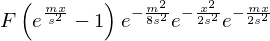

In [11]:
sympy.factor(sympy.simplify(D))

In [12]:
D.evalf(subs={x: 0, F: 1, m: 1, s: 2})

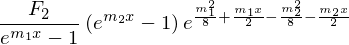

In [13]:
F1, m1, F2, m2 = sympy.symbols("F1 m1 F2 m2")

q1 = sympy.solve(D.subs({F: F1, m: m1, s: 1}) - D.subs({F: F2, m: m2, s:1}), F1)[0]
q1

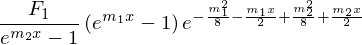

In [14]:
q2 = sympy.solve(D.subs({F: F1, m: m1, s: 1}) - D.subs({F: F2, m: m2, s:1}), F2)[0]
q2

Compute $F_1 / F_2$ as a function of $m_1$ and $m_2$.

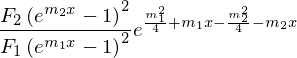

In [17]:
DD = q1/q2
DD

Set $F_1$ to equal $F_1/F_2$ (and $F_2$ to 1).

Set $m_1$ to equal $m_1/m_2$ (and $m_2$ to 1).

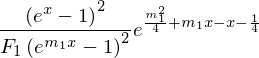

In [18]:
DD.subs({F1: F1/F2, F2: 1, m1: m1/m2, m2: 1})

In [21]:
S = DD.subs({F1: F1/F2, F2: 1, m1: m1/m2, m2: 1}).series(m1)